###### Esse é projeto final do curso de 'ETL na Prática', ministrado pela Faculdade Impacta
###### Este curos é um curos referenciado como curso extra curricular, e é disponibilizado para alunos de pós-graduação da área de dados
###### Minha certificação nesse curso, pode ser encontrada no meu perfil do LinkdIn ( www.linkedin.com/in/giovanna-lins-jacob-da-silva )
###### O conjunto de dados desse projeto pode ser encontrado no link: https://dadosabertos.camara.leg.br/swagger/api:atml

### Projeto
##### Objetivo: Armazenar os gastos (até o momento) por deputado federal
#####         1. Obter os dados
#####         2. Efetuar os ajustes necessários
#####         3. Armazenar no sqlite

### Extração

In [13]:
#Import das bibliotecas que serão utilizadas
import pandas as pd 
import requests # Essa biblioteca é responsavel por fazer a requisição dos dads para a API

In [14]:
#obtenção dos dados (Extração)
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [15]:
resultado.json()

{'dados': [{'id': 220593,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220593',
   'nome': 'Abilio Brunini',
   'siglaPartido': 'PL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
   'siglaUf': 'MT',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220593.jpg',
   'email': 'dep.abiliobrunini@camara.leg.br'},
  {'id': 204379,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
   'nome': 'Acácio Favacho',
   'siglaPartido': 'MDB',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899',
   'siglaUf': 'AP',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg',
   'email': 'dep.acaciofavacho@camara.leg.br'},
  {'id': 220714,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714',
   'nome': 'Adail Filho',
   'siglaPartido': 'REPUBLICANOS',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v

In [16]:
#Salvando o conjunto de dados em um dataframe
deputados = pd.DataFrame(resultado.json()['dados'])

In [17]:
#Visualizar o cabeçalho, para saber quais dados esse conjunto abrange
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [18]:
#Quantidade de linhas e colunas no dataframe
deputados.shape

(513, 9)

In [24]:
#Obtendo os dados de gastos por deputado
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/deputados/" + str(id) +"/despesas?itens=100&ordem=ASC&ano=2023"
    #Estamos trazendo os últimos 100 itens (compras realizadas) por deputador
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)

In [25]:
len(gastos)

513

In [26]:
len(gastos[0])

100

In [27]:
gastos[0]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066,Nota Fiscal Eletrônica,4,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221,0,220593
1,2023,11,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491,Nota Fiscal,0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163,0,220593
2,2023,5,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621,Nota Fiscal,0,2023-05-05,11533052023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1938600,0,220593
3,2023,6,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236,Recibos/Outros,1,2023-06-05,11533062023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957493,0,220593
4,2023,7,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239,Nota Fiscal,0,2023-07-05,11533072023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957494,0,220593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,9,COMBUSTÍVEIS E LUBRIFICANTES.,7613621,Nota Fiscal Eletrônica,4,2023-09-22,27201,228.05,http://www.camara.leg.br/cota-parlamentar/nota...,AUTO POSTO CONQUISTA DE ITAPIRAPUA LTDA,05310091000185,228.05,0.0,,1971082,0,220593
96,2023,9,COMBUSTÍVEIS E LUBRIFICANTES.,7613444,Nota Fiscal Eletrônica,4,2023-09-24,27217,86.69,http://www.camara.leg.br/cota-parlamentar/nota...,AUTO POSTO CONQUISTA DE ITAPIRAPUA LTDA,05310091000185,86.69,0.0,,1970975,0,220593
97,2023,3,COMBUSTÍVEIS E LUBRIFICANTES.,7516263,Nota Fiscal Eletrônica,4,2023-03-17,194042,155.50,http://www.camara.leg.br/cota-parlamentar/nota...,AUTO POSTO DRACENA LTDA,00816009000256,155.50,0.0,,1918714,0,220593
98,2023,2,COMBUSTÍVEIS E LUBRIFICANTES.,7500276,Nota Fiscal Eletrônica,4,2023-02-19,23054,287.60,http://www.camara.leg.br/cota-parlamentar/nota...,AUTO POSTO FLORAIS ME,09233622000134,287.60,0.0,,1909801,0,220593


### Transformação

In [28]:
# 'Empilhando' os dados
total = pd.concat(gastos)

In [29]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0,220593
2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1938600.0,0.0,220593
3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957493.0,0.0,220593
4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957494.0,0.0,220593


In [30]:
total.sample(3)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
49,2023.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7607238.0,Nota Fiscal,0.0,2023-08-04,19312127,47.99,https://www.camara.leg.br/cota-parlamentar/doc...,CEEE - Companhia Estadual de Distribuição de E...,08467115000100,47.99,0.0,,1967761.0,0.0,220554
74,2023.0,2.0,COMBUSTÍVEIS E LUBRIFICANTES.,7501755.0,Nota Fiscal Eletrônica,4.0,2023-02-27,754504,250.00,http://www.camara.leg.br/cota-parlamentar/nota...,AUTO POSTO PRACA 14 LTDA,01259335000191,250.00,0.0,,1910459.0,0.0,220714
88,2023.0,9.0,COMBUSTÍVEIS E LUBRIFICANTES.,7604210.0,Nota Fiscal Eletrônica,4.0,2023-09-04,293664,250.00,http://www.camara.leg.br/cota-parlamentar/nota...,AUTO POSTO CINCO ESTRELAS LTDA,00692418000611,250.00,0.0,,1966083.0,0.0,188097


In [32]:
# Verificando se existem valores ausentes no dataset
total.isnull().sum()

ano                     0
mes                     0
tipoDespesa             0
codDocumento            0
tipoDocumento           0
codTipoDocumento        0
dataDocumento           0
numDocumento            0
valorDocumento          0
urlDocumento         3995
nomeFornecedor          0
cnpjCpfFornecedor       0
valorLiquido            0
valorGlosa              0
numRessarcimento        0
codLote                 0
parcela                 0
id                      0
dtype: int64

In [33]:
# A coluna que contém valores em branco, não importante para o objetivo dessa análise, portanto, será excluída
del total['urlDocumento'] 

In [34]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0,220593
2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1938600.0,0.0,220593
3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957493.0,0.0,220593
4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957494.0,0.0,220593


In [35]:
# Quantos valores únicos possuem na coluna/base
total.numRessarcimento.value_counts()

     44722
0     3270
Name: numRessarcimento, dtype: int64

In [36]:
# Coluna dispensavel para análise, apesar de não estar efetivamente nulo, os dados dessa coluna estão em branco
del total['numRessarcimento']

In [37]:
# Verificando quantidade de linhas atual, removendo linhas duplicadas, e revisando a quantidade de linhas, se não houver alteração no valor, não há duplicatas
print(total.shape)
total.drop_duplicates()
print(total.shape)

(47992, 16)
(47992, 16)


In [38]:
# Verificando se os tipo de dados foram compreendidos corretamente pela linguagem
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47992 entries, 0 to 99
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                47992 non-null  float64
 1   mes                47992 non-null  float64
 2   tipoDespesa        47992 non-null  object 
 3   codDocumento       47992 non-null  float64
 4   tipoDocumento      47992 non-null  object 
 5   codTipoDocumento   47992 non-null  float64
 6   dataDocumento      47992 non-null  object 
 7   numDocumento       47992 non-null  object 
 8   valorDocumento     47992 non-null  float64
 9   nomeFornecedor     47992 non-null  object 
 10  cnpjCpfFornecedor  47992 non-null  object 
 11  valorLiquido       47992 non-null  float64
 12  valorGlosa         47992 non-null  float64
 13  codLote            47992 non-null  float64
 14  parcela            47992 non-null  float64
 15  id                 47992 non-null  int64  
dtypes: float64(9), int64(1), 

In [39]:
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,47992.0,47992.000000,4.799200e+04,47992.000000,47992.000000,47992.000000,47992.000000,4.799200e+04,47992.000000,47992.000000
mean,2023.0,6.975871,7.079472e+06,1.906151,1476.228548,1466.103967,7.573115,1.822423e+06,0.000667,180426.508356
std,0.0,3.154480,1.867746e+06,1.869061,3950.830965,3939.519227,125.058919,4.935615e+05,0.025814,49913.366071
min,2023.0,1.000000,0.000000e+00,0.000000,-3569.910000,-3569.910000,0.000000,0.000000e+00,0.000000,62881.000000
25%,2023.0,4.000000,7.529190e+06,0.000000,179.295000,176.987500,0.000000,1.925674e+06,0.000000,160556.000000
50%,2023.0,7.000000,7.576822e+06,1.000000,277.000000,275.040000,0.000000,1.952032e+06,0.000000,204456.000000
75%,2023.0,10.000000,7.625553e+06,4.000000,1000.000000,1000.000000,0.000000,1.978174e+06,0.000000,220587.000000
max,2023.0,12.000000,7.709949e+06,4.000000,164900.000000,164900.000000,10293.100000,2.030172e+06,1.000000,227433.000000


In [40]:
total.nomeFornecedor.value_counts()

031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    1093
TAM                                                          978
AUTO POSTO CINCO ESTRELAS LTDA                               921
GOL                                                          883
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA       853
                                                            ... 
POSTO CRISTIANOPOLIS LTDA                                      1
Posto Lupatini Ltda                                            1
POSTO MENDES FIRMINOPOLIS LTDA                                 1
Silva e Ramos Comercio de Combustiveis Ltda                    1
AUGUSTIN E CIA LTDA                                            1
Name: nomeFornecedor, Length: 6864, dtype: int64

In [43]:
total.nomeFornecedor = [str(fornecedor).upper() for fornecedor in total.nomeFornecedor]

In [44]:
total.nomeFornecedor.value_counts()

031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    1093
TAM                                                          978
AUTO POSTO CINCO ESTRELAS LTDA                               921
GOL                                                          883
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA       853
                                                            ... 
LUZIA P. DA COSTA                                              1
TABITA FERREIRA MARINHO PRODUCOES E COMUNICACAO LTDA           1
TABITA MARINHO PRODUCOES E COMUNICACAO LTDA                    1
OFFICE SOLUCOES EM EQUIPAMENTOS E MOBILIARIOS LTDA.            1
AUGUSTIN E CIA LTDA                                            1
Name: nomeFornecedor, Length: 6795, dtype: int64

### Carregamento

In [ ]:
# Nesse parte do cógido, os dados estão sendo armazenados em um arquivo de formato de banco de dados

In [45]:
from sqlalchemy import create_engine

In [47]:
engine = create_engine('sqlite:///dados_abertos.db')

In [48]:
deputados.to_sql('deputados', engine)

513

In [49]:
total.to_sql('depspesas_total', engine)

47992

### Análise dos Dados

In [50]:
ad = pd.read_sql("select * from depspesas_total;", engine)

In [51]:
ad.head()

,index,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,1969221.0,0.0,220593
1,1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,1996163.0,0.0,220593
2,2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1938600.0,0.0,220593
3,3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957493.0,0.0,220593
4,4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957494.0,0.0,220593


In [52]:
dep = pd.read_sql("select * from deputados", engine)

In [53]:
dep.head()

,index,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [54]:
# Junção entre as tabelas, a função merge funciona como o 'join' do SQL
ad = ad.merge(dep, on=['id'])

In [55]:
# Soma dos gastos agrupados por depudado
gastos_deputados = ad.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']]

In [56]:
# Ordenando
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)

In [57]:
# Por conta da ordenação, irá trazer os 5 deputados com mais gastos
gastos_deputados.head()

,valorDocumento,valorLiquido
nome,,
Cleber Verde,575479.21,572328.81
Sonize Barbosa,559621.86,556975.96
Dra. Alessandra Haber,534291.18,528254.82
Delegado Éder Mauro,530713.17,526240.40
Vinicius Gurgel,530050.15,530050.15


In [59]:
# Por conta da ordenação, irá trazer os 5 depoutados com menos gastos
gastos_deputados.tail()

,valorDocumento,valorLiquido
nome,,
Paulinho da Força,13015.85,13015.85
Carmen Zanotto,7455.71,7455.71
Delegado Bruno Lima,3126.95,3126.95
Hildo Rocha,376.45,376.45
Amom Mandel,0.00,0.00


### Vizualização 

In [60]:
%matplotlib inline

<AxesSubplot:>

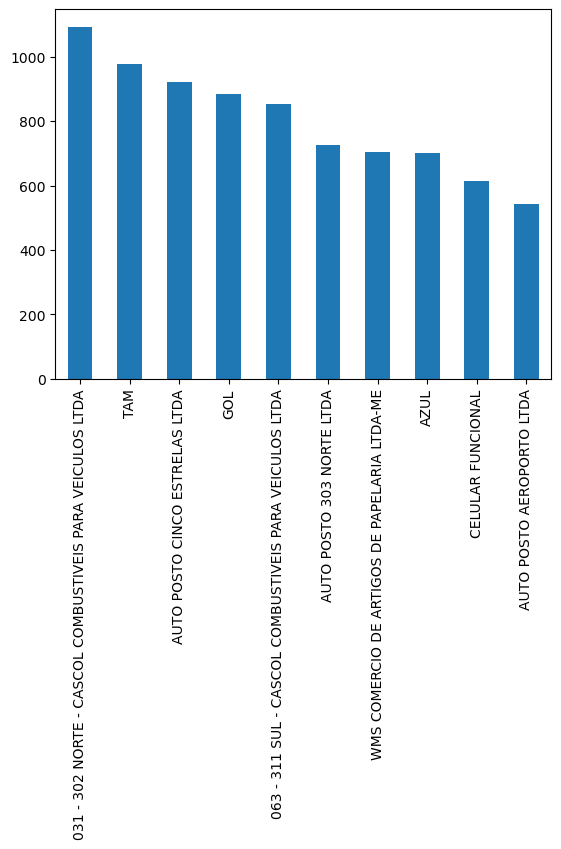

In [63]:
# Os top 10 fornecedores, considerando quantidade de compras
ad.nomeFornecedor.value_counts()[:10].plot(kind="bar")